<a href="https://colab.research.google.com/github/ch00226855/CMP414765Spring2022/blob/main/Week07_PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. <font color="green">Polynomial Regression</font>
**Polynomial regression** extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a power.

### <font color="green">Polynomial Regression with One Feature</font>
- Model Assumption: 
$$Y \approx \beta_0 + \beta_1X + \beta_2X^2 + \cdots + \beta_d X^d$$
- Least Squares Cost Function:
$$MSE(\beta) = \frac{1}{N}\sum_{i=1}^N(y^{(i)} - \beta_0 - \beta_1x^{(i)} - \cdots - \beta_d(x^{(i)})^d)^2 = \frac{1}{N}(\textbf{y} - \textbf{X}\beta)^T(\textbf{y} - \textbf{X}\beta)$$

    \begin{equation}
    \textbf{X} = \begin{pmatrix}
    1 & x^{(1)} & (x^{(1)})^2 & \cdots & (x^{(1)})^d \\
    1 & x^{(2)} & (x^{(2)})^2 & \cdots & (x^{(2)})^d \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x^{(N)} & (x^{(N)})^2 & \cdots & (x^{(N)})^d \\
    \end{pmatrix}, 
    \textbf{y}=\begin{pmatrix}
    y^{(1)}\\
    y^{(2)}\\
    \vdots\\
    y^{(N)}
    \end{pmatrix}
    \end{equation}
    
- Normal equation still applies:
$$
\hat{\beta} = argmin_\beta MSE(\beta) = (\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\textbf{y}
$$
- Simply put, polynomial regression is multilinear regression on $(X, X^2, ..., X^d)$.
- It is rarely necessary to consider $d>4$, since higher order terms make the polynomial overly flexible and tends to explode near the bounary.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Wage.csv",
                 usecols=['age', 'wage'])
df.head()

,age,wage
0,18,75.043154
1,24,70.476020
2,45,130.982177
3,43,154.685293
4,50,75.043154


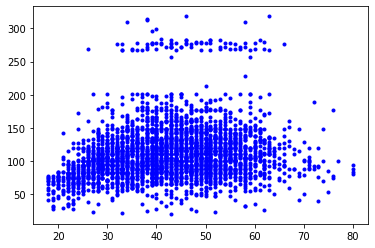

In [5]:
plt.plot(df['age'], df['wage'], 'b.')

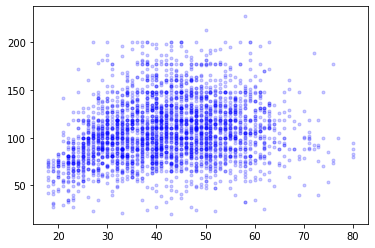

In [10]:
# From the visualization we see that the cases of wage > 250 follows a different trend.
# Let's remove these cases.

data = df[df['wage'] < 250]
plt.plot(data['age'], data['wage'], 'b.', alpha=0.2)

In [11]:
# Split the data
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2)
print(data_train.shape)
print(data_test.shape)

(2336, 2)
(585, 2)


In [13]:
# Use a linear regression model to describe the relationship between age and wage.
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(data_train[['age']], data_train['wage'])

LinearRegression()

In [14]:
# Parameter values of the linear model
print(model_lr.coef_)
print(model_lr.intercept_)

[0.5951482]
82.13167311504832


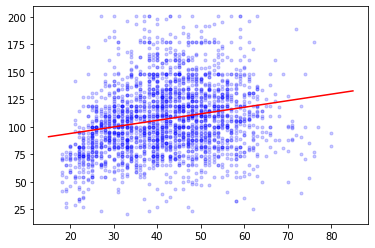

In [17]:
# Visualize the linear model
plt.plot(data_train['age'], data_train['wage'], "b.", alpha=0.2)
x_coor = [15, 85]

beta0 = model_lr.intercept_
beta1 = model_lr.coef_[0]
y_coor = [beta0 + beta1 * x for x in x_coor]
plt.plot(x_coor, y_coor, 'r-')

In [20]:
# Calculate the model MSE on the test set
from sklearn.metrics import mean_squared_error
y_pred = model_lr.predict(data_test[['age']])
mse = mean_squared_error(data_test['wage'], y_pred)
print("Test MSE:", mse)
print("Test RMSE (Root-Mean-Square-Error):", mse ** 0.5)

Test MSE: 1037.8595204508945
Test RMSE (Root-Mean-Square-Error): 32.215827173159695


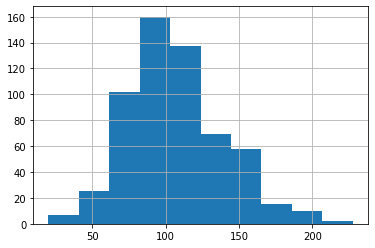

In [21]:
# Compare the RMSE to the wage values
data_test['wage'].hist()

In [28]:
# Let's train a polynomial model instead.
model_pr = LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
age_poly = poly_features.fit_transform(data_train[['age']])
# print(age_poly)

model_pr.fit(age_poly, data_train['wage'])

LinearRegression()

In [29]:
print(model_pr.coef_)
print(model_pr.intercept_)

[ 4.56147582 -0.04603056]
2.9400352947934465


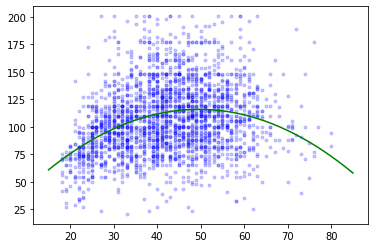

In [31]:
import numpy as np
plt.plot(data_train['age'], data_train['wage'], 'b.', alpha=0.2)
x_coor = np.linspace(15, 85, 100)
beta0 = model_pr.intercept_
beta1, beta2 = model_pr.coef_
y_coor = [beta0 + beta1 * x + beta2 * x ** 2 for x in x_coor]
plt.plot(x_coor, y_coor, 'g-')

### <font color="green">Overfitting vs. Underfitting</font>
<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171229/overfitting_1.png" width="600">
<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png" width="600">

How to detect model overfitting?
- Training error vs. test error
- Cross Validation
- Model visualization

### <font color="green">Preventing Model Overfitting</font>
- Get more training data
- Feature selection
- Regularization
- Early stopping

<img src="https://hackernoon.com/hn-images/1*vuZxFMi5fODz2OEcpG-S1g.png" width="600">